## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:150px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading in the Nobel Prize data
nobel = pd.read_csv("/content/Nobel Prize Winner.csv")

# Taking a look at the first several winners
nobel.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [14]:
nobel.columns

Index(['Year', 'Category', 'Prize', 'Motivation', 'Prize Share', 'Laureate ID',
       'Laureate Type', 'Full Name', 'Birth Date', 'Birth City',
       'Birth Country', 'Sex', 'Organization Name', 'Organization City',
       'Organization Country', 'Death Date', 'Death City', 'Death Country'],
      dtype='object')

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [2]:
# Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
len(nobel.index)

969

In [4]:
# Display the number of prizes won by male and female recipients.
nobel["Sex"].value_counts()

,count
Sex,
Male,893
Female,50


In [9]:
# Display the number of prizes won by the top 10 nationalities.
nobel["Birth Country"].value_counts().head(10)

,count
Birth Country,
United States of America,276
United Kingdom,88
Germany,70
France,53
Sweden,30
Japan,29
Russia,20
Netherlands,19
Italy,18


## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [15]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['Birth Country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['Year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade",as_index=False)["usa_born_winner"].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners.head()

,decade,usa_born_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

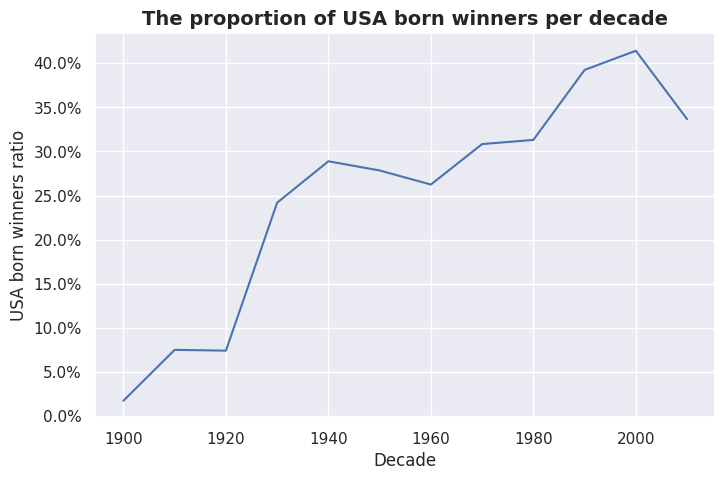

In [16]:
# Setting the plotting theme and setting the size of all plots.
sns.set()
plt.rcParams['figure.figsize'] = [8, 5]

# Plotting USA born winners
ax = sns.lineplot(x="decade" ,y="usa_born_winner", data=prop_usa_winners)

# Adding axes' labels and title
plt.title("The proportion of USA born winners per decade",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("USA born winners ratio")
plt.xlabel("Decade")

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

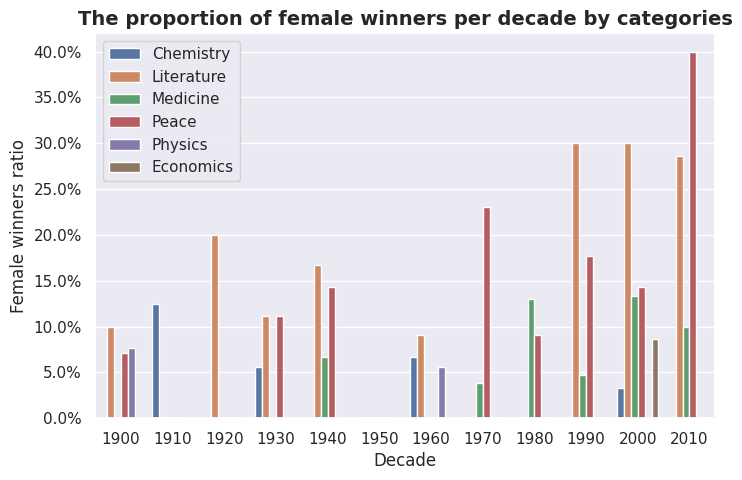

In [19]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel["Sex"]=="Female"
prop_female_winners = nobel.groupby(["decade","Category"], as_index=False)["female_winner"].mean()

# Plotting female winners
ax = sns.barplot(x="decade", y="female_winner", hue="Category", data=prop_female_winners)

# Adding axes' labels, title and legend
plt.title("The proportion of female winners per decade by categories",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Female winners ratio")
plt.xlabel("Decade")
plt.legend(loc='upper left')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

<p>Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p> Let's see the imbalance between the number of female and male winners by dividing them into age groups and calculating the distribution ratio. And visualize this data!</p>

In [27]:
# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'], format='%Y-%m-%d', errors='coerce')

# Calculating the age of Nobel Prize winners
nobel['Age'] = nobel["Year"] - nobel['Birth Date'].dt.year

# Creating age categories
bins = [nobel["Age"].min()-1,29,39,49,59,69,79,nobel["Age"].max()]
label = ["<-29","30-39","40-49","50-59","60-69","70-79","80+"]
nobel["age_interval"] = pd.cut(nobel["Age"], bins=bins, labels = label)

# Total number of winners
total = float(len(nobel))

# Grouping winners by age interval and sex
nobel_age_interval = nobel.groupby(["Sex","age_interval"])["Laureate ID"].count()
nobel_age_interval = pd.DataFrame(nobel_age_interval).reset_index()
nobel_age_interval.columns = ["Sex","age_interval","number_of_winners"]

# Calculation of the distribution ratio by age interval and sex
nobel_age_interval["ratio"] = round((nobel_age_interval["number_of_winners"]/total)*100,2)
nobel_age_interval.head()

,Sex,age_interval,number_of_winners,ratio
0,Female,<-29,1,0.10
1,Female,30-39,7,0.72
2,Female,40-49,6,0.62
3,Female,50-59,13,1.34
4,Female,60-69,8,0.83


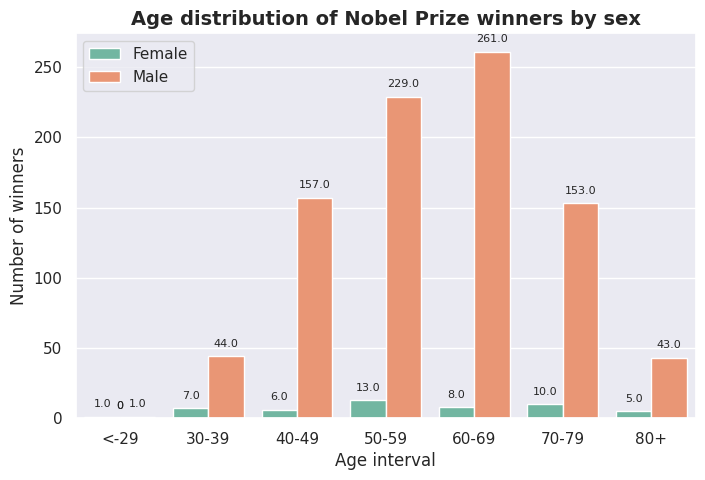

In [28]:
# Plotting the age distribution of Nobel Prize winners by sex
ax = sns.barplot(x="age_interval", y="number_of_winners",
                 hue="Sex",
                 data=nobel_age_interval,
                 palette="Set2")

# Bin label/text
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha = 'center', va = 'center', size=8,
                   xytext = (0, 9),
                   textcoords = 'offset points')

# Adding axes' labels, title and legend
plt.title("Age distribution of Nobel Prize winners by sex",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Number of winners")
plt.xlabel("Age interval")
plt.legend(loc='upper left')
plt.show()

## 6. The first woman to win the Nobel Prize
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [29]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel["Sex"]=="Female"].nsmallest(1, columns="Year")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age,age_interval
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True,36.0,30-39


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these few people?</p>

In [31]:
# Selecting the laureates that have received 2 or more prizes.
columns = nobel[["Full Name","Year","Category","Laureate ID","Sex","Prize"]]
two_times_winners = columns.groupby("Full Name").filter(lambda group: len(group) >= 2).sort_values("Laureate ID")
two_times_winners.head(6)

,Full Name,Year,Category,Laureate ID,Sex,Prize
19,"Marie Curie, née Sklodowska",1903,Physics,6,Female,The Nobel Prize in Physics 1903
63,"Marie Curie, née Sklodowska",1911,Chemistry,6,Female,The Nobel Prize in Chemistry 1911
257,Hideki Yukawa,1949,Physics,54,Male,The Nobel Prize in Physics 1949
258,Hideki Yukawa,1949,Physics,54,Male,The Nobel Prize in Physics 1949
297,Walther Bothe,1954,Physics,62,Male,The Nobel Prize in Physics 1954
298,Walther Bothe,1954,Physics,62,Male,The Nobel Prize in Physics 1954


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! But how old are you generally when you get the prize?</p>

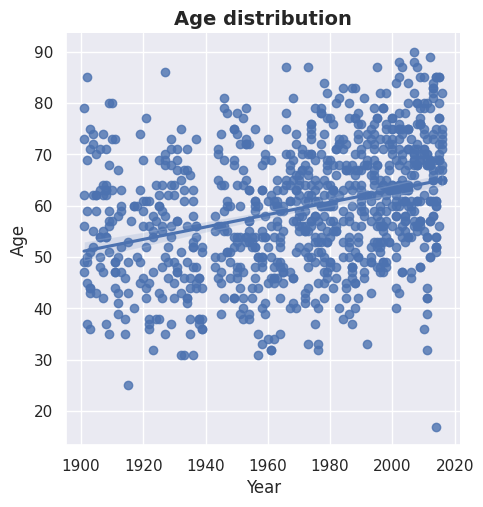

In [34]:
# Plotting the age of Nobel Prize winners
ax = sns.lmplot(x="Year", y="Age", data=nobel)
plt.rcParams['figure.figsize'] = [8, 5]

# Adding axes' labels, title and legend
plt.title("Age distribution",
          fontdict={'fontsize': 14},
          fontweight ='bold',
          loc='center')
plt.ylabel("Age")
plt.xlabel("Year")
plt.show()

## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

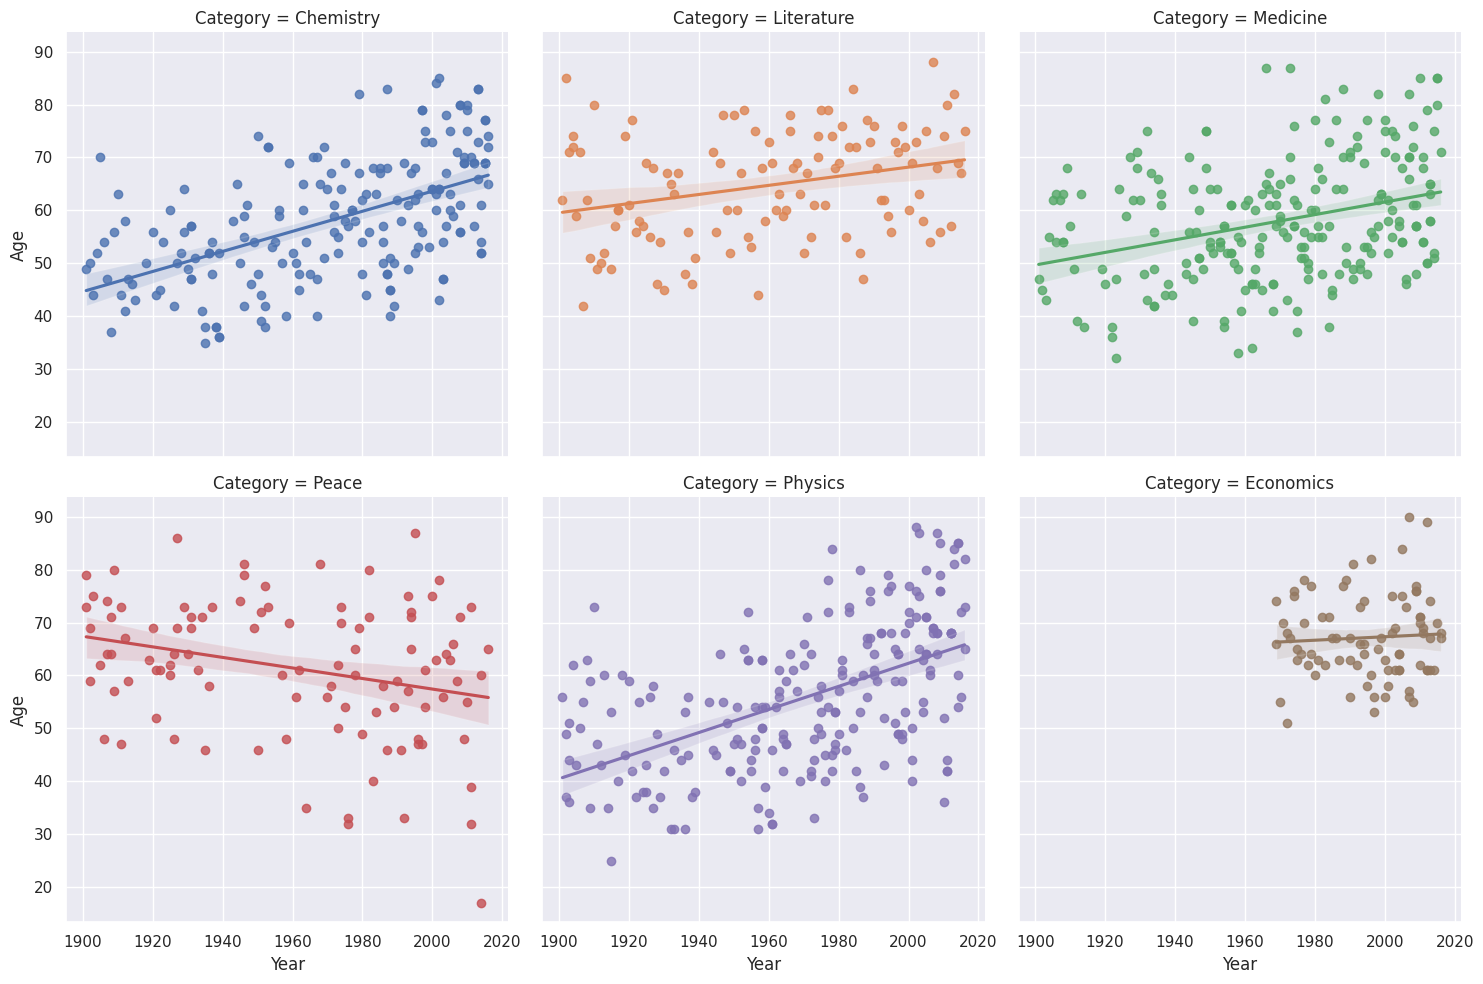

In [36]:
# Same plot as above, but separate plots for each type of Nobel Prize


ax = sns.lmplot(x="Year", y="Age", data=nobel,
                hue="Category",
                col="Category",
                col_wrap=3)
plt.show()

More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time.
* The trend is strongest for physics: the average age used to be below 50, and now it's almost 70.
* Literature and economics are more stable. We also see that economics is a newer category.
* But peace shows an opposite trend where winners are getting younger!

## 10. Oldest and youngest winners
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [37]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'Age'))

# The youngest winner of a Nobel Prize as of 2016
display(nobel.nsmallest(1, 'Age'))

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age,age_interval
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0,80+


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age,age_interval
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0,<-29


## 11. You get a prize!
<p><img style="float: right;margin:; max-width:100px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p>You get a prize for making it to the very end of this notebook!</p>
<p>Please feel free to leave a comment to improve this notebook and visualizations.</p>
<p>Thank you so much!</p>